In [1]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [2]:
upload=files.upload()

Saving Zoo.csv to Zoo.csv


In [3]:
data=pd.read_csv('Zoo.csv')
data


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
data.drop('animal name',axis=1,inplace=True)

In [5]:
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


-->type is the 'dependent variable

-->remaining attribute are independent variables


In [6]:
data.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


<Axes: >

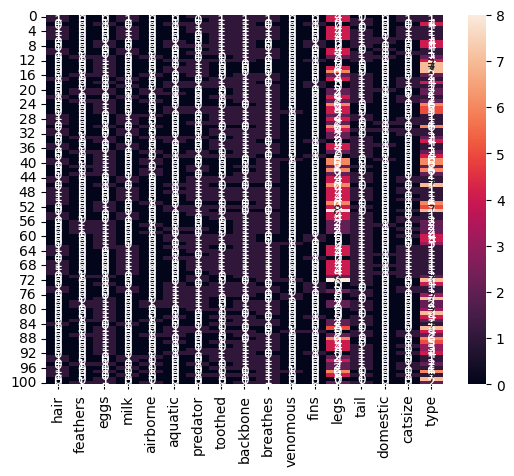

In [128]:
sns.heatmap(data,color='k',annot=True)

<Axes: >

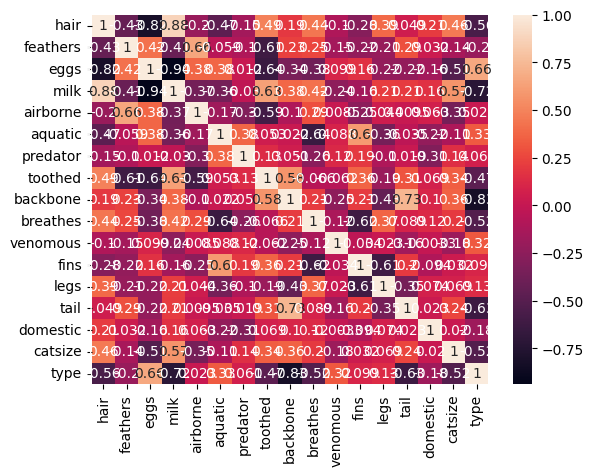

In [129]:
sns.heatmap(data.corr(),color='k',annot=True)

In [124]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [126]:
data.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

data is cleaned and can perform further preprocessing


<Axes: xlabel='legs', ylabel='count'>

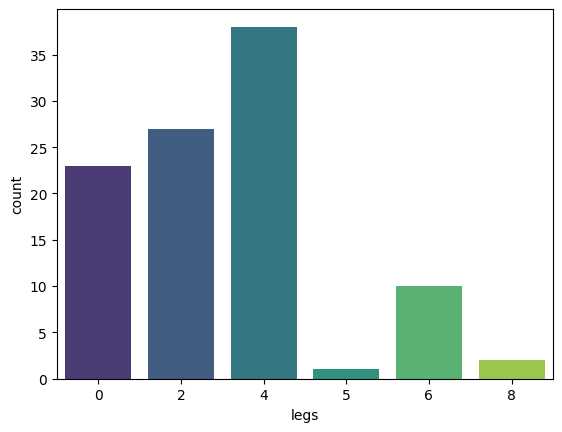

In [10]:
sns.countplot(x=data['legs'],palette='viridis')

<Axes: xlabel='catsize', ylabel='count'>

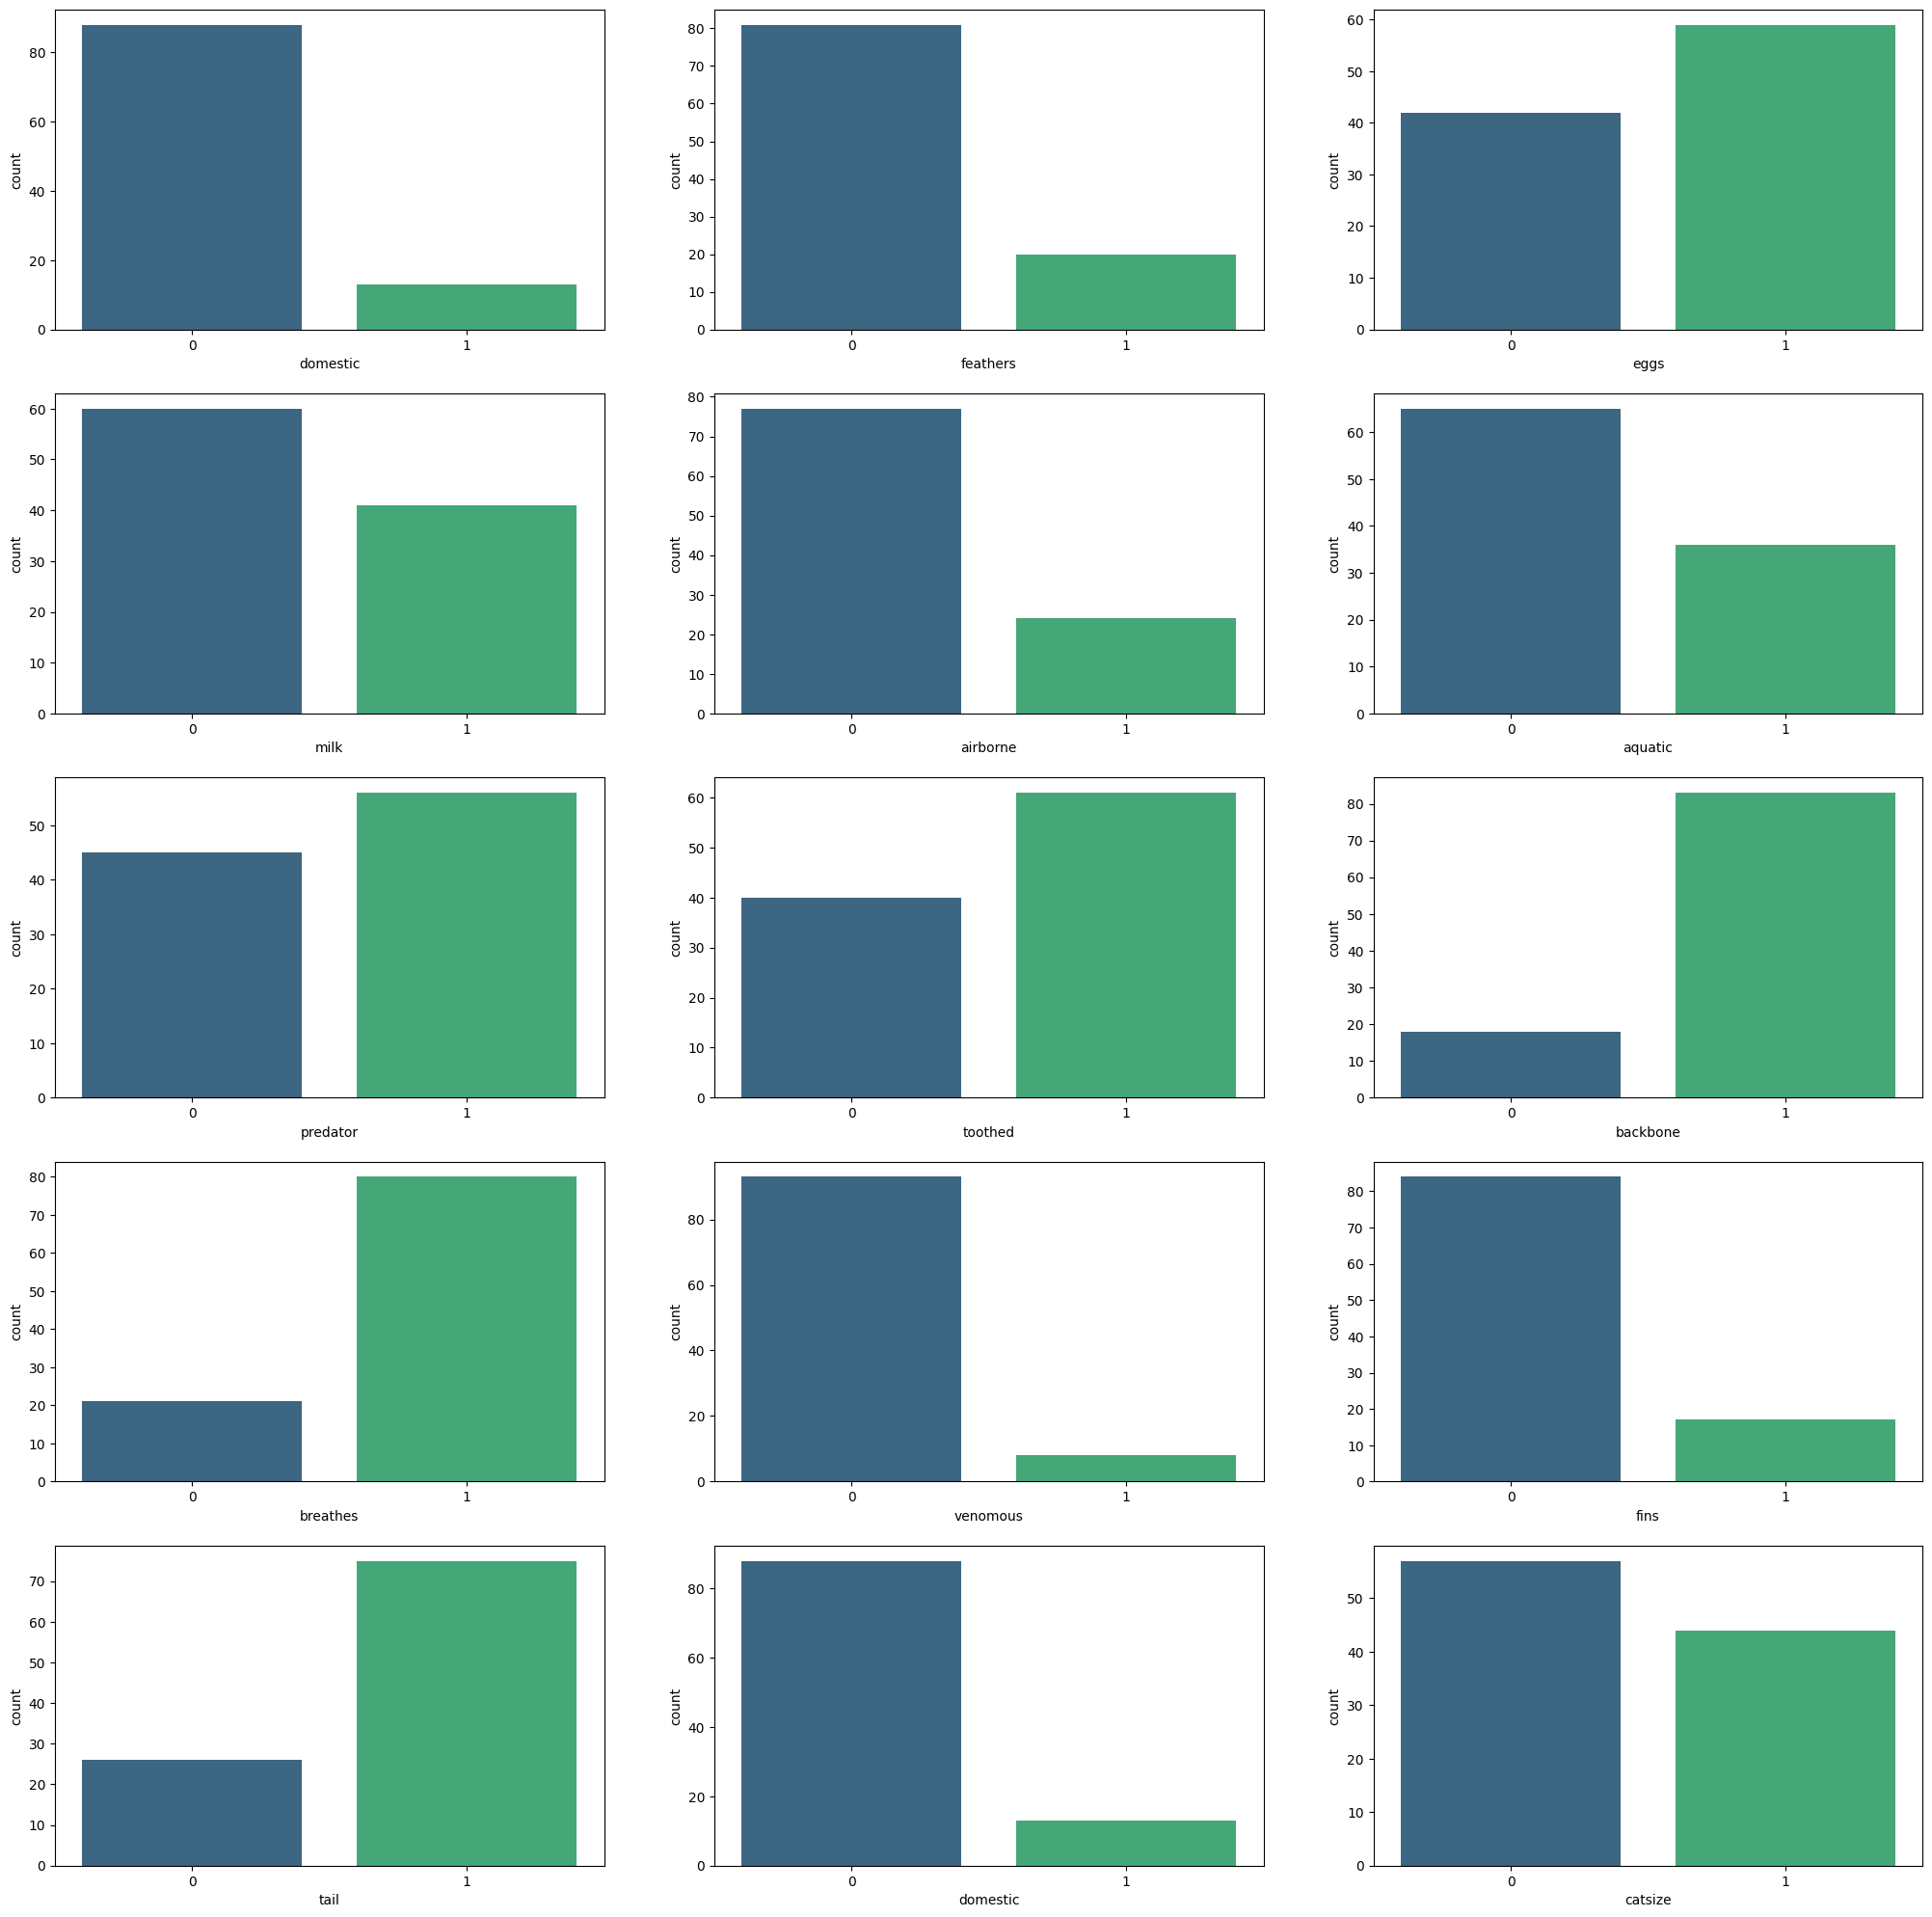

In [8]:
#plt.style.use("ggplot")

import seaborn as sns
fig,ax=plt.subplots(5,3,figsize=(25,25))
sns.countplot(x=data['domestic'],palette  ='viridis',ax=ax[0,0])
sns.countplot(x=data['feathers'],palette='viridis',ax=ax[0,1])
sns.countplot(x=data['eggs'],palette='viridis',ax=ax[0,2])
sns.countplot(x=data['milk'],palette='viridis',ax=ax[1,0])
sns.countplot(x=data['airborne'],palette='viridis',ax=ax[1,1])
sns.countplot(x=data['aquatic'],palette='viridis',ax=ax[1,2])
sns.countplot(x=data['predator'],palette='viridis',ax=ax[2,0])
sns.countplot(x=data['toothed'],palette='viridis',ax=ax[2,1])
sns.countplot(x=data['backbone'],palette='viridis',ax=ax[2,2])
sns.countplot(x=data['breathes'],palette='viridis',ax=ax[3,0])
sns.countplot(x=data['venomous'],palette='viridis',ax=ax[3,1])
sns.countplot(x=data['fins'],palette='viridis',ax=ax[3,2])
sns.countplot(x=data['tail'],palette='viridis',ax=ax[4,0])
sns.countplot(x=data['domestic'],palette='viridis',ax=ax[4,1])
sns.countplot(x=data['catsize'],palette='viridis',ax=ax[4,2])



In [67]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [12]:
x.shape

(101, 16)

In [13]:
y.shape

(101,)

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=30)


In [69]:
len(x_train),len(x_test)

(65, 36)

In [70]:
print("shape of x_train :",x_train.shape)
print("shape of test :",x_test.shape)

shape of x_train : (65, 16)
shape of test : (36, 16)


In [71]:
kfold=KFold(n_splits=10)


In [92]:
from sklearn.model_selection import cross_val_score
model=KNeighborsClassifier(n_neighbors=12)
results=cross_val_score(model,x,y,cv=kfold)
results

array([1. , 0.6, 0.8, 1. , 0.9, 0.8, 0.8, 0.5, 0.6, 0.8])

In [93]:
results.mean()

0.78

In [106]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
knn_score=model.score(x_test,y_test)
knn_score*100

97.22222222222221

In [105]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
linear_score=regressor.score(x_test,y_test)
linear_score*100

93.96079908171887

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=15)
gbc.fit(x_train,y_train)
gbc_score=gbc.score(x_test,y_test)
gbc_score*100

83.33333333333334

In [45]:
!pip install catboost




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [116]:
import warnings
from catboost import CatBoostClassifier
cbc=CatBoostClassifier(iterations=10,learning_rate=0.3)
cbc.fit(x_train,y_train);
cbc_score=cbc.score(x_test,y_test)
cbc_score*100

0:	learn: 1.7064811	total: 6.72ms	remaining: 60.5ms
1:	learn: 1.3234711	total: 15.8ms	remaining: 63.3ms
2:	learn: 1.1768095	total: 21.5ms	remaining: 50.3ms
3:	learn: 0.9604893	total: 27.3ms	remaining: 40.9ms
4:	learn: 0.7923433	total: 33.3ms	remaining: 33.3ms
5:	learn: 0.6963935	total: 39ms	remaining: 26ms
6:	learn: 0.6108776	total: 43.2ms	remaining: 18.5ms
7:	learn: 0.5487715	total: 44.9ms	remaining: 11.2ms
8:	learn: 0.5031513	total: 45.7ms	remaining: 5.07ms
9:	learn: 0.4437771	total: 48.2ms	remaining: 0us


91.66666666666666

In [117]:
import plotly.express as px
x=['knn_score','cbc_score','linear_score','gbc_score']
y=[knn_score,cbc_score,linear_score,gbc_score]
fig=px.bar(x=x,y=y,title='models_names-models_scores',labels={'x':'models_names','y':'model_scores'})
fig.show()

Here,We can understand that knn model is giving the highest accuracy compared to other models.

In catboostclassifier if we tune the learnig_rate at learning_rate=0.2 we will get 97.22222222222221
 which is equal to the knn_score,that means we can use cbc or knn for deployment.



In [118]:
cbc=CatBoostClassifier(iterations=10,learning_rate=0.2)
cbc.fit(x_train,y_train);
cbc_score=cbc.score(x_test,y_test)
cbc_score*100

0:	learn: 1.7821128	total: 3.16ms	remaining: 28.4ms
1:	learn: 1.4694297	total: 11.1ms	remaining: 44.4ms
2:	learn: 1.3505390	total: 16.3ms	remaining: 38.1ms
3:	learn: 1.1649618	total: 23.6ms	remaining: 35.4ms
4:	learn: 1.0188810	total: 28.7ms	remaining: 28.7ms
5:	learn: 0.9126186	total: 36.1ms	remaining: 24.1ms
6:	learn: 0.8237841	total: 42.9ms	remaining: 18.4ms
7:	learn: 0.7557809	total: 45.7ms	remaining: 11.4ms
8:	learn: 0.7054305	total: 46.6ms	remaining: 5.18ms
9:	learn: 0.6356172	total: 54.1ms	remaining: 0us


97.22222222222221